# 8a.nu Log-Book

This notebook analyses the data gathered on 9/13/2017 by xxx on the log-book of 8a.nu, the largest climbing community online: https://github.com/mplaine/8a.nu-Scraper

The data was downloaded via Kaggle: https://www.kaggle.com/dcohen21/8anu-climbing-logbook : 8a.nu at the date of the scrapping had 67.025 users worldwide

My purpose is to analyse the sport climbing in Portugal, understand what are the most climbed crags, what is the average grade send by crag and the importance of climbers height and weight, and years of climbing on the grades

Lets start by importing the tables and pass it to pandas DataFrames

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 100)

In [2]:
# Read sqlite query results into a pandas DataFrame
def qry(q, connection = sqlite3.connect("data/database.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df

In [3]:
# work w dataframes
df_users = qry("SELECT * FROM USER")
df_grades = qry("SELECT * FROM grade")
df_methods = qry("SELECT * FROM method")
df_ascents = qry("SELECT * FROM ascent")

Explore the tables in terms of columns and data types

### Prepare users data:

In [4]:
## get info from user table
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            62593 non-null  int64 
 1   first_name    62593 non-null  object
 2   last_name     62593 non-null  object
 3   city          62593 non-null  object
 4   country       62593 non-null  object
 5   sex           62593 non-null  int64 
 6   height        62593 non-null  int64 
 7   weight        62593 non-null  int64 
 8   started       62593 non-null  int64 
 9   competitions  47942 non-null  object
 10  occupation    47946 non-null  object
 11  sponsor1      47644 non-null  object
 12  sponsor2      47633 non-null  object
 13  sponsor3      47627 non-null  object
 14  best_area     47942 non-null  object
 15  worst_area    1227 non-null   object
 16  guide_area    47942 non-null  object
 17  interests     47946 non-null  object
 18  birth         27856 non-null  object
 19  pres

In [5]:
# rename id by user id and country by user_country
df_users.rename(columns={'id':'user_id','country':'user_country'}, inplace=True)

In [6]:
# keep columns
df_users_f = df_users.loc[:, ['user_id','user_country','sex','height','weight','started','birth']]

In [7]:
df_users_f.head()

,user_id,user_country,sex,height,weight,started,birth
0,1,SWE,0,177,73,1996,1976-03-10
1,2,SWE,0,0,0,2000,None
2,3,SWE,0,180,78,1995,1973-09-09
3,4,SWE,1,165,58,2001,1984-07-26
4,5,USA,0,0,0,1991,1969-05-07


In [95]:
df_users.loc[df_users['user_id']==51564]

,user_id,first_name,last_name,city,user_country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
48394,51564,first,last,palmela,PRT,0,169,63,2009,,,,,,arrabida,None,setubal / sesimbra,,1982-12-01,,0,0


### Prepare ascents data:

In [8]:
df_ascents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111877 entries, 0 to 4111876
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    int64 
 1   user_id               int64 
 2   grade_id              int64 
 3   notes                 object
 4   raw_notes             int64 
 5   method_id             int64 
 6   climb_type            int64 
 7   total_score           int64 
 8   date                  int64 
 9   year                  int64 
 10  last_year             int64 
 11  rec_date              int64 
 12  project_ascent_date   int64 
 13  name                  object
 14  crag_id               int64 
 15  crag                  object
 16  sector_id             int64 
 17  sector                object
 18  country               object
 19  comment               object
 20  rating                int64 
 21  description           object
 22  yellow_id             int64 
 23  climb_try             int64 
 24

In [9]:
df_ascents.rename(columns={'id':'ascent_id'}, inplace=True)

In [10]:
df_ascents_f = df_ascents.loc[:, ['ascent_id','user_id','grade_id','method_id','climb_type','year','name','crag','sector_id','sector','country','rating','user_recommended']]

In [11]:
df_ascents_f.head()

,ascent_id,user_id,grade_id,method_id,climb_type,year,name,crag,sector_id,sector,country,rating,user_recommended
0,2,1,36,3,0,1999,The King And I,Railay,61,Dum's kitchen,THA,0,0
1,3,1,36,3,0,1999,vet ej,Nya berg - segl.,0,,,0,0
2,4,1,36,3,0,1999,Mr Big,Sjöända,371,Huvudväggen,SWE,0,0
3,5,1,36,3,0,1999,Tak ska du ha,Sjöända,371,Huvudväggen,SWE,0,0
4,6,1,36,3,0,1999,Korpen flyger,"Rankulla, Vetlanda",0,,,0,0


In [96]:
df_ascents.loc[df_ascents['user_id']==51564]

,ascent_id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,last_year,rec_date,project_ascent_date,name,crag_id,crag,sector_id,sector,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
2547414,3071029,51564,44,,0,4,0,548,1379714400,2013,0,1380935844,0,El Carallon,1032,Fenda,427,El Carallon,PRT,,0,,255,0,0,0,1,0
2547418,3071033,51564,33,,0,2,0,403,1375912800,2013,0,1380936448,0,Jardim da Celeste,1032,Fenda,2008,Cú de Judas,PRT,,0,,255,0,0,0,0,0
2547423,3071038,51564,40,Hard,16,2,0,553,1375912800,2013,0,1380936573,0,Terror na autovia,1032,Fenda,2008,Cú de Judas,PRT,,0,,0,0,0,0,0,0
2547426,3071041,51564,33,,0,3,0,495,1379714400,2013,0,1380936761,0,La ultima a la derecha,1032,Fenda,0,Antigo,PRT,,0,,0,0,0,0,0,0
2550136,3074097,51564,40,One Hang,64,2,0,553,1381010400,2013,0,1381094414,0,Geração Gri,1032,Fenda,427,El Carallon,PRT,,0,,255,0,0,1,0,0
2550138,3074099,51564,44,,0,4,0,548,1381010400,2013,0,1381094446,0,Era uma Vez,1032,Fenda,427,El Carallon,PRT,,0,,255,0,0,0,0,0
2550139,3074100,51564,44,One Hang,64,4,0,548,1381010400,2013,0,1381094508,0,El Carallon,1032,Fenda,427,El Carallon,PRT,,0,,255,0,0,1,0,0
2559957,3085507,51564,31,,0,2,0,353,1381615200,2013,0,1381783264,0,Ternura dos 40,27609,Azoia,2398,Poema Rocha,PRT,,0,,255,0,0,0,0,0
2559962,3085512,51564,36,,0,2,0,453,1381615200,2013,0,1381783329,0,Pra todos,27609,Azoia,642,Cova Mijona,PRT,,0,,0,0,0,0,0,0
2559965,3085515,51564,36,,0,2,0,453,1381701600,2013,0,1381783358,0,Flor de Alfarim,27609,Azoia,642,Cova Mijona,PRT,,0,,0,0,0,0,0,0


### Prepare grades data:

In [12]:
## get info from grades table
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     83 non-null     int64 
 1   score                  83 non-null     int64 
 2   fra_routes             83 non-null     object
 3   fra_routes_input       83 non-null     int64 
 4   fra_routes_selector    83 non-null     int64 
 5   fra_boulders           83 non-null     object
 6   fra_boulders_input     83 non-null     int64 
 7   fra_boulders_selector  83 non-null     int64 
 8   usa_routes             83 non-null     object
 9   usa_routes_input       83 non-null     int64 
 10  usa_routes_selector    83 non-null     int64 
 11  usa_boulders           83 non-null     object
 12  usa_boulders_input     83 non-null     int64 
 13  usa_boulders_selector  83 non-null     int64 
dtypes: int64(10), object(4)
memory usage: 9.2+ KB


In [13]:
df_grades.rename(columns={'id':'grade_id'}, inplace=True)

In [14]:
df_grades_f = df_grades.loc[:, ['grade_id','score','fra_routes']]

In [15]:
df_grades_f.head()

,grade_id,score,fra_routes
0,1,0,-
1,2,0,1
2,3,0,1a
3,4,0,1b
4,5,0,1c


### Prepare methods data:

In [16]:
## get info from methods table
df_methods.head()

,id,score,shorthand,name
0,1,0,redpoint,Redpoint
1,2,53,flash,Flash
2,3,145,onsight,Onsight
3,4,-52,toprope,Toprope
4,5,95,onsight,Onsight


In [17]:
df_methods.rename(columns={'id':'method_id'}, inplace=True)

In [18]:
df_methods_f = df_methods.loc[:,['method_id','score','name']]

### Filter for ascents in Portugal:

In [234]:
## crags from PT
df_pt = df_ascents_f.loc[(df_ascents_f.country == 'PRT')]
df_pt.shape

(30208, 13)

### Merge users with ascents:

In [235]:
## merges ascents data to users. we get all users that sent a route in a portuguese crag
user_ascents = df_users_f.merge(right = df_pt, left_on = 'user_id', right_on = 'user_id', how='inner')

In [236]:
user_ascents.shape

(30208, 19)

In [25]:
user_ascents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30208 entries, 0 to 30207
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           30208 non-null  int64 
 1   user_country      30208 non-null  object
 2   sex               30208 non-null  int64 
 3   height            30208 non-null  int64 
 4   weight            30208 non-null  int64 
 5   started           30208 non-null  int64 
 6   birth             25328 non-null  object
 7   ascent_id         30208 non-null  int64 
 8   grade_id          30208 non-null  int64 
 9   method_id         30208 non-null  int64 
 10  climb_type        30208 non-null  int64 
 11  year              30208 non-null  int64 
 12  name              30208 non-null  object
 13  crag              30208 non-null  object
 14  sector_id         30208 non-null  int64 
 15  sector            30208 non-null  object
 16  country           30208 non-null  object
 17  rating      

In [22]:
user_ascents.head()

,user_id,user_country,sex,height,weight,started,birth,ascent_id,grade_id,method_id,climb_type,year,name,crag,sector_id,sector,country,rating,user_recommended
0,89,ITA,0,172,63,1989,1971-09-18,3402814,62,1,0,2014,UHU,Fenda,427,El Carallon,PRT,2,0
1,89,ITA,0,172,63,1989,1971-09-18,3402815,55,3,0,2014,El Carallon,Fenda,427,El Carallon,PRT,0,0
2,89,ITA,0,172,63,1989,1971-09-18,3402816,55,3,0,2014,O Último Voo de Nosferatu,Fenda,427,El Carallon,PRT,0,0
3,89,ITA,0,172,63,1989,1971-09-18,3403029,53,3,0,2014,Casa dos Bicos,Meio Mango,11239,Cabo da boa esperança,PRT,3,1
4,89,ITA,0,172,63,1989,1971-09-18,3406882,53,3,0,2014,Gugudádá,Fenda,1950,Amarelas,PRT,0,0


### Merges grades to ascents:

In [237]:
## junta grades to ascents
user_grades = user_ascents.merge(right = df_grades_f, left_on = 'grade_id', right_on = 'grade_id', how='inner')

In [238]:
user_grades.shape

(30208, 21)

In [25]:
user_grades.head()

,user_id,user_country,sex,height,weight,started,birth,ascent_id,grade_id,method_id,climb_type,year,name,crag,sector_id,sector,country,rating,user_recommended,score,fra_routes
0,89,ITA,0,172,63,1989,1971-09-18,3402814,62,1,0,2014,UHU,Fenda,427,El Carallon,PRT,2,0,1000,8a
1,361,PRT,0,167,73,1997,1983-03-27,5436,62,1,0,2000,Marsupilami,Fenda,427,El Carallon,PRT,2,0,1000,8a
2,408,PRT,0,172,63,2001,1985-09-08,36985,62,1,0,2001,Marsupilami,Fenda,427,El Carallon,PRT,1,0,1000,8a
3,408,PRT,0,172,63,2001,1985-09-08,51177,62,1,0,2002,3 Mentirosos,Buracas,0,,PRT,3,0,1000,8a
4,408,PRT,0,172,63,2001,1985-09-08,141513,62,1,0,2003,Rampa dos Crocodilos,Fenda,810,Rampa,PRT,3,0,1000,8a


### Filter for lead climbing ascents:

In [239]:
## lets focus on sport climbing (lead)
sport_climb = user_grades.loc[(user_grades.climb_type==0)]

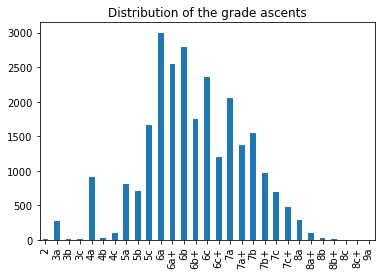

In [27]:
sport_climb.fra_routes.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of the grade ascents')
plt.show()
## as I expected the number of ascents by grade follows a poisson distribution where most of the send are lower than 7a
## its funny to see that there are the double send in 7as that 6c+s. Climbers prefer to fall in a 7? xD

In [240]:
# number of crags in PT
len(sport_climb.crag.unique())

381

### Filter for Guia, Fenda, Azoia and Meio Mango:

In [241]:
# keep crags
sport_climb_f = sport_climb.loc[sport_climb.crag.isin(
['Fenda','Guia','Azoia','Meio Mango','Rampa','cascais','Condimínio fechado', \
'Guia Nova','Portiño','Mango','Portinho da Arrabida','Cascais','Azoia-portugal', \
'Meio mango','portinho da arrabida','Portinho de Arrabida','Portinho da Rábida','Varandas da Azoia', \
'Portinho da Arrábida','Portinho','Ovomaltine','portinho', \
 'Reforma educativa','Serra da Azoia','Geracao gri','Portihno de Arrabida','Portinho de Arravida'])]

### Treat crags names:

In [242]:
# low case and capilatize crag names
sport_climb_f['crag'] = sport_climb_f.crag.apply(str.lower).apply(str.capitalize)

In [243]:
print(sorted(sport_climb_f.crag.unique()))

['Azoia', 'Cascais', 'Fenda', 'Geracao gri', 'Guia', 'Guia nova', 'Mango', 'Meio mango', 'Ovomaltine', 'Portihno de arrabida', 'Portinho', 'Portinho da arrabida', 'Portinho da arrábida', 'Portinho da rábida', 'Portinho de arrabida', 'Portinho de arravida', 'Portiño', 'Reforma educativa', 'Serra da azoia', 'Varandas da azoia']


In [244]:
## fix ascents name
sport_climb_f.loc[sport_climb_f.crag == 'Reforma educativa', ['name']] = 'Reforma educativa'
sport_climb_f.loc[sport_climb_f.crag == 'Reforma educativa', ['crag']] = 'Fenda'

sport_climb_f.loc[sport_climb_f.crag == 'Ovomaltine', ['name']] = 'Ovomaltine'
sport_climb_f.loc[sport_climb_f.crag == 'Ovomaltine', ['crag']] = 'Guia'

sport_climb_f.loc[sport_climb_f.crag == 'Geracao gri', ['name']] = 'Geracao gri'
sport_climb_f.loc[sport_climb_f.crag == 'Geracao gri', ['crag']] = 'Fenda'

In [245]:
print(sorted(sport_climb_f.crag.unique()))

['Azoia', 'Cascais', 'Fenda', 'Guia', 'Guia nova', 'Mango', 'Meio mango', 'Portihno de arrabida', 'Portinho', 'Portinho da arrabida', 'Portinho da arrábida', 'Portinho da rábida', 'Portinho de arrabida', 'Portinho de arravida', 'Portiño', 'Serra da azoia', 'Varandas da azoia']


In [246]:
## fix crags names

sport_climb_f.crag.replace(['Azoia-portugal','Varandas da azoia','Condimínio fechado','Serra da azoia'], 'Azoia', inplace=True)
sport_climb_f.crag.replace(['Portinho da arrabida','Rampa','Porthiño rabida','Portihno de arrabida','?','Arrábida','Geracao gri','Portinho da rábida','Portinhio da rabida', 'Portinho', "Portinho d'arrábida", 'Portinho da arrábida', 'Portinho de arrabida', 'Portinho de arravida', 'Portinnho de arrabida', 'Portiño','Reforma educativa'],'Fenda', inplace=True)
# sport_climb_f.crag.replace('Fojo - Diedro', 'Fojo', inplace=True)
sport_climb_f.crag.replace(['Guia nova','Guia - cascais','Bloco escadas','Faro da guia', 'Farol da guia','Ovomaltine','Cascais'], 'Guia', inplace=True)
sport_climb_f.crag.replace(['Mango'], 'Meio mango', inplace=True)
sport_climb_f.crag.replace(['Montejunto novo','Monte junto','Monejunto velho','Montejunto velho'], 'Montejunto', inplace=True)
# sport_climb_f.crag.replace('Arrábida - pedreiras','Pedreiras', inplace=True)
# sport_climb_f.crag.replace(['Sessimbra','Dente de leão'], 'Sesimbra', inplace=True)
# sport_climb_f.crag.replace(['Amizade','Penedo da amizade'], 'Sintra', inplace=True)

In [247]:
sport_climb_f.crag.unique()

array(['Fenda', 'Meio mango', 'Azoia', 'Guia'], dtype=object)

In [248]:
sport_climb_f.crag.value_counts()

Fenda         3748
Guia          3643
Azoia         1102
Meio mango     917
Name: crag, dtype: int64

### Treat sectors names:

In [249]:
# lower and capitalize
sport_climb_f['sector'] = sport_climb_f.sector.apply(str.lower).apply(str.capitalize)

In [250]:
# Fix sectors in Fenda
# unique sectors from Fenda
np.sort(sport_climb_f.loc[sport_climb.crag == 'Fenda']['sector'].unique())

array(['', 'Amarelas', 'Amarellas e el carrallon', 'Antigo', 'Arrabida',
       'Caralhon', 'Caralion', 'Carallon', 'Carallón', 'Crocodilos',
       'Cu de judas', 'Cú de judas', 'C� de judas', 'El caralhon',
       'El caralhón', 'El carallon', 'El carallón', 'Giriflé -giroflá',
       'Girofle', 'Girofle girofla', 'Girofle-girofla', 'Giroflé giroflá',
       'Giroflé- giroflá', 'Giroflé-giroflá', 'Giroflé-girofá',
       'Giroflégiroflá', 'Girofl�-girofl�', 'Limpo-pó', 'Limpó-pó',
       'Paparazzi', 'Piratas', 'Placa das namoradas', 'Placas',
       'Portinho', 'Portinho da arrabida', 'Principal', 'Rampa',
       'Rampa dos corcodilos', 'Rampa dos crocodilos', 'Sector antigo'],
      dtype=object)

In [251]:
# remove observations
sport_climb_f = sport_climb_f.loc[~sport_climb_f.sector.isin(['Antigo','Sector antigo','?','Meixilhoeiro','Meixiloheiro','Mexilhoeiro',
       'Mexilhoeiro - lady stile'])]
sport_climb_f = sport_climb_f.loc[~sport_climb_f.name.isin(['¿?','?7?','?6?','?','zz','ww','xx'])]

In [272]:
#fix names of the sectors
sport_climb_f.sector.replace(['Amarelas','Amarellas e el carrallon','Caralhon','Caralion','Carallón','El caralhon','El caralhón','El carallon','Principal','El carallón','Limpo-pó', 'Limpó-pó', 'Paparazzi','Carayon'], 'Carallon', inplace=True)
sport_climb_f.sector.replace(['C� de Judas','Cú de Judas','cu de judas','Cu de judas','Cu de Judas','C� de judas'],'Cú de judas', inplace=True)
sport_climb_f.sector.replace(['Giroflé-girofá','Girofle girofla','Girofle-girofla','Giroflé giroflá','Giroflé- giroflá','Girofle','Giriflé -giroflá','Giroflégiroflá','Girofl�-girofl�','Arrabida'],'Giroflé-giroflá',inplace=True)
sport_climb_f.sector.replace(['Rampa dos crocodilos','Rampa dos corcodilos','Rampa','Cocodrilo','Corcodilos'],'Crocodilos',inplace=True)
sport_climb_f.sector.replace(['Dos piratas'],'Piratas',inplace=True)


In [273]:
# final list
sport_climb_f.loc[sport_climb_f.crag == 'Fenda']['sector'].unique()

array(['Carallon', 'Crocodilos', 'Piratas', '', 'Giroflé-giroflá',
       'Cú de judas', 'Placas'], dtype=object)

In [254]:
# Fix sectors in Meio Mango
# unique sectors from Meio mango
np.sort(sport_climb_f.loc[sport_climb_f.crag == 'Meio mango']['sector'].unique())

array(['', 'Baia', 'Baía', 'Cabo da', 'Cabo da boa esperança',
       'Cabo da boa esperan�a', 'Cabo das tormentas', 'De-graus',
       'Degraus', 'Escadas', 'Margem sul', 'Meio mango', 'Pocas',
       'Portugal', 'Poças', 'Po�as', 'Santa linha', 'Sector poças',
       'Smart', 'St linha', 'Tormentas'], dtype=object)

In [255]:
sport_climb_f.loc[sport_climb_f.sector == 'Portugal']

,user_id,user_country,sex,height,weight,started,birth,ascent_id,grade_id,method_id,climb_type,year,name,crag,sector_id,sector,country,rating,user_recommended,score,fra_routes
3845,33270,PRT,1,158,53,2009,1989-05-05,1713107,21,3,0,2009,Galia,Guia,0,Portugal,PRT,0,0,160,4a
21249,32945,ESP,0,179,68,2001,1983-02-17,2553124,44,2,0,2012,7 minutos,Meio mango,0,Portugal,PRT,2,1,600,6c


In [256]:
#fix names of the sectors
sport_climb_f.sector.replace(['Baia'], 'Baía', inplace=True)
sport_climb_f.sector.replace(['De-graus','Escadas'], 'Degraus', inplace=True)
sport_climb_f.sector.replace(['Po�as','Pocas','Meio mango','Portugal','Sector poças'], 'Poças', inplace=True)
sport_climb_f.sector.replace(['St linha'], 'Santa linha', inplace=True)
sport_climb_f.sector.replace(['Cabo da boa esperan�a','Margem sul','Tormentas','Cabo das tormentas','Cabo da'], 'Cabo da boa esperança', inplace=True)

In [257]:
sport_climb_f.loc[sport_climb_f.crag == 'Meio mango']['sector'].value_counts()

Poças                    433
                         198
Baía                     149
Santa linha               62
Cabo da boa esperança     54
Degraus                   10
Smart                      7
Name: sector, dtype: int64

In [258]:
np.sort(sport_climb_f.loc[sport_climb_f.crag == 'Guia']['sector'].unique())

array(['', '...', '???', 'Alcatifa', 'Bloco', 'Bloco das escadas',
       'Bloco de escadas', 'Bloco escadas', 'Boca de inferno', 'Cantinho',
       'Cantinho dos teimosos', 'Caravela', 'Corta unhas', 'Corta-unhas',
       'Degraus', 'El tubo', 'Equilibrio', 'Escada', 'Esgoto',
       'Falesia do farol', 'Farol', 'Farol-esgoto', 'Guia', 'Guia nova',
       'Occidente', 'Ocidental', 'Ocidente', 'Placa sem nome', 'Poças',
       'Sector das escadas', 'Sector ocidente', 'Solo', 'Taxi', 'Tubi',
       'Tubo'], dtype=object)

In [259]:
sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.sector == 'Guia')]

,user_id,user_country,sex,height,weight,started,birth,ascent_id,grade_id,method_id,climb_type,year,name,crag,sector_id,sector,country,rating,user_recommended,score,fra_routes
1433,408,PRT,0,172,63,2001,1985-09-08,155357,53,1,0,2003,Martine,Guia,0,Guia,PRT,1,0,800,7b
1481,1331,PRT,0,182,73,2000,1977-04-08,3474786,53,1,0,2014,Martine,Guia,0,Guia,PRT,3,0,800,7b
2045,10694,PRT,0,120,100,1915,None,485619,53,1,0,2006,Martine,Guia,0,Guia,PRT,3,0,800,7b
2050,10694,PRT,0,120,100,1915,None,729425,53,1,0,2007,Martine,Guia,0,Guia,PRT,3,0,800,7b
2052,10694,PRT,0,120,100,1915,None,746120,53,1,0,2007,Martine,Guia,0,Guia,PRT,3,0,800,7b
2094,11114,PRT,0,178,78,0,1978-03-07,965168,53,1,0,2008,Martine,Guia,0,Guia,PRT,0,0,800,7b
2345,16590,PRT,1,171,53,2005,1992-05-04,3474784,53,1,0,2014,Martine,Guia,0,Guia,PRT,3,0,800,7b
2552,20950,PRT,0,174,63,2008,1987-03-24,3033338,53,1,0,2013,Martine,Guia,0,Guia,PRT,0,0,800,7b
2946,37060,PRT,0,171,63,1993,1977-03-20,3955506,53,1,0,2015,Martine,Guia,0,Guia,PRT,0,0,800,7b
15741,49007,PRT,0,180,73,2011,1985-06-26,3075375,36,2,0,2013,Placa sem nome,Guia,0,Guia,PRT,0,1,400,6a


In [260]:
#fix names of the sectors
sport_climb_f.loc[sport_climb_f['name'] == 'Alcatifa','sector'] = 'Alcatifa'
sport_climb_f.loc[sport_climb_f['name'] == 'Alcatifa','name'] = 'Equilibrio'

sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.sector == 'Poças'), 'sector'] = 'Ocidente'
sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.name.isin(['Martine','Cristo'])), 'sector'] = 'Bloco escadas'
sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.name == 'Massacre a Leste'), 'sector'] = 'Farol'
sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.name.isin(['Over the Top','Levitação'])), 'sector'] = 'Escadas'
sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.name == 'Descanso dos Guerreiros'), 'sector'] = 'Bloco'
sport_climb_f.loc[(sport_climb_f.crag == 'Guia') & (sport_climb_f.name.isin(['Fissura','Ovelha Doli','Carneiro','Placa sem nome'])), 'sector'] = 'Alcatifa'


In [261]:
#fix names of the sectors
sport_climb_f.sector.replace(['...','Solo'], 'Bloco', inplace=True)
sport_climb_f.sector.replace(['???'], 'Alcatifa', inplace=True)
sport_climb_f.sector.replace(['Bloco das escadas','Bloco de escadas','Boca de inferno','Taxi'], 'Bloco escadas', inplace=True)
sport_climb_f.sector.replace(['Cantinho'], 'Cantinho dos teimosos', inplace=True)
sport_climb_f.sector.replace(['Corta-unhas'], 'Corta unhas', inplace=True)
sport_climb_f.sector.replace(['Farol-esgoto','Esgoto','Falesia do farol'], 'Farol', inplace=True)
sport_climb_f.sector.replace(['Caravela','Sector ocidente','Occidente','Ocidental'], 'Ocidente', inplace=True)
sport_climb_f.sector.replace(['El tubo','Tubi'], 'Tubo', inplace=True)
sport_climb_f.sector.replace(['Sector das escadas','Escada'], 'Escadas', inplace=True)

In [262]:
np.sort(sport_climb_f.loc[sport_climb_f.crag == 'Guia']['sector'].unique())

array(['', 'Alcatifa', 'Bloco', 'Bloco escadas', 'Cantinho dos teimosos',
       'Corta unhas', 'Degraus', 'Escadas', 'Farol', 'Guia nova',
       'Ocidente', 'Tubo'], dtype=object)

In [263]:
# Azoia
np.sort(sport_climb_f.loc[sport_climb_f.crag == 'Azoia']['sector'].unique())

array(['', 'Cona mijona', 'Condomina fechado', 'Condominio',
       'Condominio fechado', 'Condominio privado', 'Condomínio',
       'Condomínio fechado', 'Condom�nio fechado', 'Condómino fechado',
       'Cova', 'Cova mijona', 'Cova mixona', 'Cova mjona', 'Janelas',
       'Poema roca', 'Poema rocha', 'Praia', 'Varanda da azóia',
       'Varandas', 'Varandas da azoia'], dtype=object)

In [264]:
sport_climb_f.loc[sport_climb_f.sector == 'Vv']

,user_id,user_country,sex,height,weight,started,birth,ascent_id,grade_id,method_id,climb_type,year,name,crag,sector_id,sector,country,rating,user_recommended,score,fra_routes


In [265]:
#fix names of the sectors
sport_climb_f.sector.replace(['Cona mijona','Cova','Cova mixona','Cova mjona'], 'Cova mijona', inplace=True)
sport_climb_f.sector.replace(['Condomina fechado','Condominio','Condominio privado','Condomínio','Condomínio fechado','Condom�nio fechado','Condómino fechado'], 'Condominio fechado', inplace=True)
sport_climb_f.sector.replace(['Poema roca','Janelas'], 'Poema rocha', inplace=True)
sport_climb_f.sector.replace(['Varandas da azoia','Varanda da azóia'], 'Varandas', inplace=True)

In [266]:
# after
np.sort(sport_climb_f.loc[sport_climb_f.crag == 'Azoia']['sector'].unique())

array(['', 'Condominio fechado', 'Cova mijona', 'Poema rocha', 'Praia',
       'Varandas'], dtype=object)

In [274]:
# check
sport_climb_f.groupby(['crag','sector'], as_index=False).size()

,crag,sector,size
0,Azoia,,216
1,Azoia,Condominio fechado,334
2,Azoia,Cova mijona,345
3,Azoia,Poema rocha,139
4,Azoia,Praia,11
5,Azoia,Varandas,42
6,Fenda,,101
7,Fenda,Carallon,2050
8,Fenda,Crocodilos,610
9,Fenda,Cú de judas,236


In [269]:
sport_climb_f.loc[sport_climb_f.crag == 'Fenda']['sector'].value_counts()

Carallon           2049
Crocodilos          596
Piratas             434
Giroflé-giroflá     257
Cú de judas         236
                    101
Cocodrilo            13
Placas                3
Dos piratas           1
Corcodilos            1
Carayon               1
Name: sector, dtype: int64

In [275]:
# routes with sector == '' - they all have
sport_climb_f.loc[(sport_climb_f.sector == '')].crag.unique()

array(['Fenda', 'Meio mango', 'Guia', 'Azoia'], dtype=object)

In [288]:
sport_climb_f.loc[(sport_climb_f.sector == ''),['name','crag','fra_routes']].drop_duplicates()

,name,crag,fra_routes
114,Dominio da kind,Guia,8a
155,Mae dos deuses,Guia,8a
341,Psico-ritual,Guia,7b+
342,Metálica,Guia,7b+
366,Meio manguito,Meio mango,7b+
367,Geração 70,Meio mango,7b+
371,Ratas del aire,Meio mango,7b+
373,Mau tempo no canal,Meio mango,7b+
374,Dívida externa,Meio mango,7b+
381,Mangolóide,Meio mango,7b+


In [281]:
sport_climb_f['name'] = sport_climb_f.name.apply(str.lower).apply(str.capitalize)

In [291]:
# replace

# Azoia
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Botznik','Muda de vida','Bufas reais','Condomínio fechado'])), 'sector'] = 'Condominio Fechado'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Fisioterapia da broca','Granda bico'])), 'sector'] = 'Varandas'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Poema rocha','Pai nosso'])), 'sector'] = 'Poema rocha'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name == 'Cabaré do texas'), 'sector'] = 'Cova mijona'


# Fenda
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Mamba preta','Bombeirada na serra','Tótó','Branca de neve','Quaqua on rrice'])), 'sector'] = 'Crocodilos'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Tiro e queda','Rei da sardinha','Reforma educativa','Garacao gri','Capitán hadock','Memorex','Fita métrica','Limpó hadock','Marsupilami','Uhu','Super cola 3','Nosferatu','Unicornio','Paparazi','Gugudádá'])), 'sector'] = 'Carallon'

# Mango
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['O senhor das anilhas','Margem das anilhas','Burro sentado','Vitória','Margem sul','Casa dos bicos'])), 'sector'] = 'Cabo da boa esperança'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Eu a ti dobrava-te','Nada na manga','Dívida interna','Só a reebok','Lesionado abençoado','7 pegues','Destrepe do mal','Solário'])), 'sector'] = 'Poças'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name == 'Refúgio das freiras'), 'sector'] = 'Degraus'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Dia da agonia','Matar o bicho','Fim da linha'])), 'sector'] = 'Baía'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Mar de bering','Cabo das tormentas','Velho do Restelo','Humildade relativa','Adamastor'])), 'sector'] = 'Santa Linha'

# Guia
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name.isin(['Psico','Dragon ball','Via verde'])), 'sector'] = 'Escadas'
sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name == 'Doce'), 'sector'] = 'Tubo'
# sport_climb_f.loc[(sport_climb_f.sector == '') & (sport_climb_f.name == 'Solo'), 'sector'] = 'Bloco'

In [232]:
# crags location
crags_coord = pd.DataFrame(np.array([['Azoia', 38.422780, -9.181600],['Fenda',38.480470,-8.982700],['Guia',38.695234,-9.120170],
                                    ['Meio mango',38.409770,-9.207920]]),
                           columns = ['crag','lon','lat'])
crags_coord

,crag,lon,lat
0,Azoia,38.42278,-9.1816
1,Fenda,38.48047,-8.9827
2,Guia,38.695234,-9.12017
3,Meio mango,38.40977,-9.20792


In [ ]:
# merge with data
